In [61]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score

In [6]:
df = pd.read_csv(r"dataset\IPL_Data.csv",encoding="latin1")
df.head()


,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,PBKS,https://sports.ndtv.com/cricket/players/1430-m...,Batsman,12.00,Mayank Anurag Agarwal,"February 16, 1991 Bangalore, Karnataka","31 Years, 0 Months, 28 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.0,50.0
3,Shahrukh Khan,PBKS,https://sports.ndtv.com/cricket/players/113433...,All-Rounder,9.00,Masood Shahrukh Khan,"May 27, 1995 Chennai, Tamil Nadu","26 Years, 9 Months, 20 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.0,6.0


In [7]:
df = df.drop(['Url','Age','Full Name', 'Born', 'Sport','HighestInnScore','Best'],axis=1,inplace=True)




In [8]:
df.isnull().sum()

Name               0
Team               0
Type               0
ValueinCR          0
National Side      6
Batting Style     10
Bowling           31
MatchPlayed       75
InningsBatted     75
NotOuts           75
RunsScored        84
100s              75
50s               75
4s                75
6s                75
BattingAVG        92
BattingS/R        75
CatchesTaken      92
StumpingsMade     92
Ducks             76
R/O               76
InningsBowled    115
Overs            115
Maidens          115
RunsConceded     115
Wickets          115
3s               115
5s               115
BowlingAVG       132
EconomyRate      115
S/R              132
Mtc              115
dtype: int64

In [9]:
le = preprocessing.LabelEncoder()
df['Team']= le.fit_transform(df['Team'])
df['Type']= le.fit_transform(df['Type'])
df['National Side']= le.fit_transform(df['Type'])
df['Batting Style']= le.fit_transform(df['Batting Style'])
df['Bowling']= le.fit_transform(df['Bowling'])


In [10]:
df.columns

Index(['Name', 'Team', 'Type', 'ValueinCR', 'National Side', 'Batting Style',
       'Bowling', 'MatchPlayed', 'InningsBatted', 'NotOuts', 'RunsScored',
       '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken',
       'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled', 'Overs', 'Maidens',
       'RunsConceded', 'Wickets', '3s', '5s', 'BowlingAVG', 'EconomyRate',
       'S/R', 'Mtc'],
      dtype='object')

In [11]:
df

,Name,Team,Type,ValueinCR,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,...,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,6,1,12.00,1,1,6,100.0,95.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liam Livingstone,6,0,11.50,0,1,4,9.0,9.0,1.0,...,1.0,0.0,13.0,0.0,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,6,2,9.25,2,0,7,50.0,18.0,8.0,...,190.0,2.0,1560.0,76.0,4.0,0.0,20.52,8.21,15.00,50.0
3,Shahrukh Khan,6,0,9.00,0,1,6,11.0,10.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikhar Dhawan,6,1,8.25,1,0,6,192.0,191.0,25.0,...,8.0,0.0,66.0,4.0,0.0,0.0,16.50,8.25,12.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Gurkeerat Singh Mann,2,0,0.50,0,1,6,41.0,32.0,8.0,...,13.0,0.0,97.0,5.0,0.0,0.0,19.40,7.46,15.60,6.0
233,Noor Ahmad,2,2,0.30,2,1,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,Darshan Nalkande,2,0,0.20,0,1,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,Sai Sudharsan,2,0,0.20,0,0,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.fillna(0)

In [13]:
df

,Name,Team,Type,ValueinCR,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,...,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,6,1,12.00,1,1,6,100.0,95.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
1,Liam Livingstone,6,0,11.50,0,1,4,9.0,9.0,1.0,...,1.0,0.0,13.0,0.0,0.0,0.0,0.00,13.00,0.00,1.0
2,Kagiso Rabada,6,2,9.25,2,0,7,50.0,18.0,8.0,...,190.0,2.0,1560.0,76.0,4.0,0.0,20.52,8.21,15.00,50.0
3,Shahrukh Khan,6,0,9.00,0,1,6,11.0,10.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
4,Shikhar Dhawan,6,1,8.25,1,0,6,192.0,191.0,25.0,...,8.0,0.0,66.0,4.0,0.0,0.0,16.50,8.25,12.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Gurkeerat Singh Mann,2,0,0.50,0,1,6,41.0,32.0,8.0,...,13.0,0.0,97.0,5.0,0.0,0.0,19.40,7.46,15.60,6.0
233,Noor Ahmad,2,2,0.30,2,1,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
234,Darshan Nalkande,2,0,0.20,0,1,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
235,Sai Sudharsan,2,0,0.20,0,0,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           237 non-null    object 
 1   Team           237 non-null    int32  
 2   Type           237 non-null    int32  
 3   ValueinCR      237 non-null    float64
 4   National Side  237 non-null    int64  
 5   Batting Style  237 non-null    int32  
 6   Bowling        237 non-null    int32  
 7   MatchPlayed    237 non-null    float64
 8   InningsBatted  237 non-null    float64
 9   NotOuts        237 non-null    float64
 10  RunsScored     237 non-null    float64
 11  100s           237 non-null    float64
 12  50s            237 non-null    float64
 13  4s             237 non-null    float64
 14  6s             237 non-null    float64
 15  BattingAVG     237 non-null    float64
 16  BattingS/R     237 non-null    float64
 17  CatchesTaken   237 non-null    float64
 18  StumpingsM

In [15]:
df['Type']

0      1
1      0
2      2
3      0
4      1
      ..
232    0
233    2
234    0
235    0
236    0
Name: Type, Length: 237, dtype: int32

In [16]:
df.columns

Index(['Name', 'Team', 'Type', 'ValueinCR', 'National Side', 'Batting Style',
       'Bowling', 'MatchPlayed', 'InningsBatted', 'NotOuts', 'RunsScored',
       '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken',
       'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled', 'Overs', 'Maidens',
       'RunsConceded', 'Wickets', '3s', '5s', 'BowlingAVG', 'EconomyRate',
       'S/R', 'Mtc'],
      dtype='object')

In [72]:
df_bats = pd.DataFrame(columns = ['Name', 'Team', 'Type', 'ValueinCR', 'National Side', 'Batting Style',
       'Bowling','MatchPlayed', 'InningsBatted', 'NotOuts',
       'RunsScored', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O'])
j=0
for i in range(len(df['Type'])):
    if df['Type'][i] == 1:
        df_bats.loc[j]= df.iloc[i]
        j+=1

In [73]:
df_bats.head()

,Name,Team,Type,ValueinCR,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,...,100s,50s,4s,6s,BattingAVG,BattingS/R,CatchesTaken,StumpingsMade,Ducks,R/O
0,Mayank Agarwal,6,1,12.00,1,1,6,100.0,95.0,4.0,...,1.0,11.0,203.0,85.0,23.41,135.47,40.0,0.0,6.0,4.0
1,Shikhar Dhawan,6,1,8.25,1,0,6,192.0,191.0,25.0,...,2.0,44.0,654.0,124.0,34.84,126.64,82.0,0.0,11.0,16.0
2,Bhanuka Rajapaksa,6,1,0.50,1,2,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3,Kane Williamson,9,1,14.00,1,1,6,63.0,62.0,15.0,...,0.0,17.0,165.0,56.0,40.10,131.26,29.0,0.0,1.0,3.0
4,Rahul Tripathi,9,1,8.50,1,1,9,62.0,60.0,7.0,...,0.0,7.0,136.0,48.0,26.13,136.31,23.0,0.0,1.0,4.0


In [74]:
df_bowl = pd.DataFrame(columns = ['Name', 'Team', 'Type', 'ValueinCR', 'National Side', 'Batting Style',
       'Bowling', 'MatchPlayed', 'InningsBatted', 'NotOuts',
       'RunsScored', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled',
       'Overs', 'Maidens', 'RunsConceded', 'Wickets', '3s', '5s',
       'BowlingAVG', 'EconomyRate', 'S/R', 'Mtc'])
j=0
for i in range(len(df['Type'])):
    if df['Type'][i] == 2:
        df_bowl.loc[j]= df.iloc[i]
        j+=1

df_bowl.head()

,Name,Team,Type,ValueinCR,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,...,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Kagiso Rabada,6,2,9.25,2,0,7,50.0,18.0,8.0,...,190.0,2.0,1560.0,76.0,4.0,0.0,20.52,8.21,15.00,50.0
1,Rahul Chahar,6,2,5.25,2,1,5,42.0,11.0,4.0,...,150.0,0.0,1117.0,43.0,3.0,0.0,25.97,7.44,20.93,41.0
2,Arshdeep Singh,6,2,4.00,2,0,3,23.0,3.0,2.0,...,76.1,1.0,669.0,30.0,3.0,1.0,22.30,8.78,15.23,23.0
3,Vaibhav Arora,6,2,2.00,2,1,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
4,Nathan Ellis,6,2,0.75,2,1,8,3.0,2.0,1.0,...,11.0,0.0,90.0,1.0,0.0,0.0,90.00,8.18,66.00,3.0


In [75]:
df_all = pd.DataFrame(columns = ['Name', 'Team', 'Type', 'ValueinCR', 'National Side', 'Batting Style',
       'Bowling','MatchPlayed', 'InningsBatted', 'NotOuts',
       'RunsScored', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled',
       'Overs', 'Maidens', 'RunsConceded', 'Wickets', '3s', '5s',
       'BowlingAVG', 'EconomyRate', 'S/R', 'Mtc'])
j=0
for i in range(len(df['Type'])):
    if df['Type'][i] == 0:
        df_all.loc[j]= df.iloc[i]
        j+=1

df_all.head()

,Name,Team,Type,ValueinCR,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,...,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Liam Livingstone,6,0,11.5,0,1,4,9.0,9.0,1.0,...,1.0,0.0,13.0,0.0,0.0,0.0,0.0,13.00,0.0,1.0
1,Shahrukh Khan,6,0,9.0,0,1,6,11.0,10.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,Odean Smith,6,0,6.0,0,1,9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,Harpreet Brar,6,0,3.8,0,0,12,10.0,6.0,6.0,...,32.0,1.0,228.0,5.0,1.0,0.0,45.6,7.12,38.4,10.0
4,Raj Bawa,6,0,2.0,0,0,10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


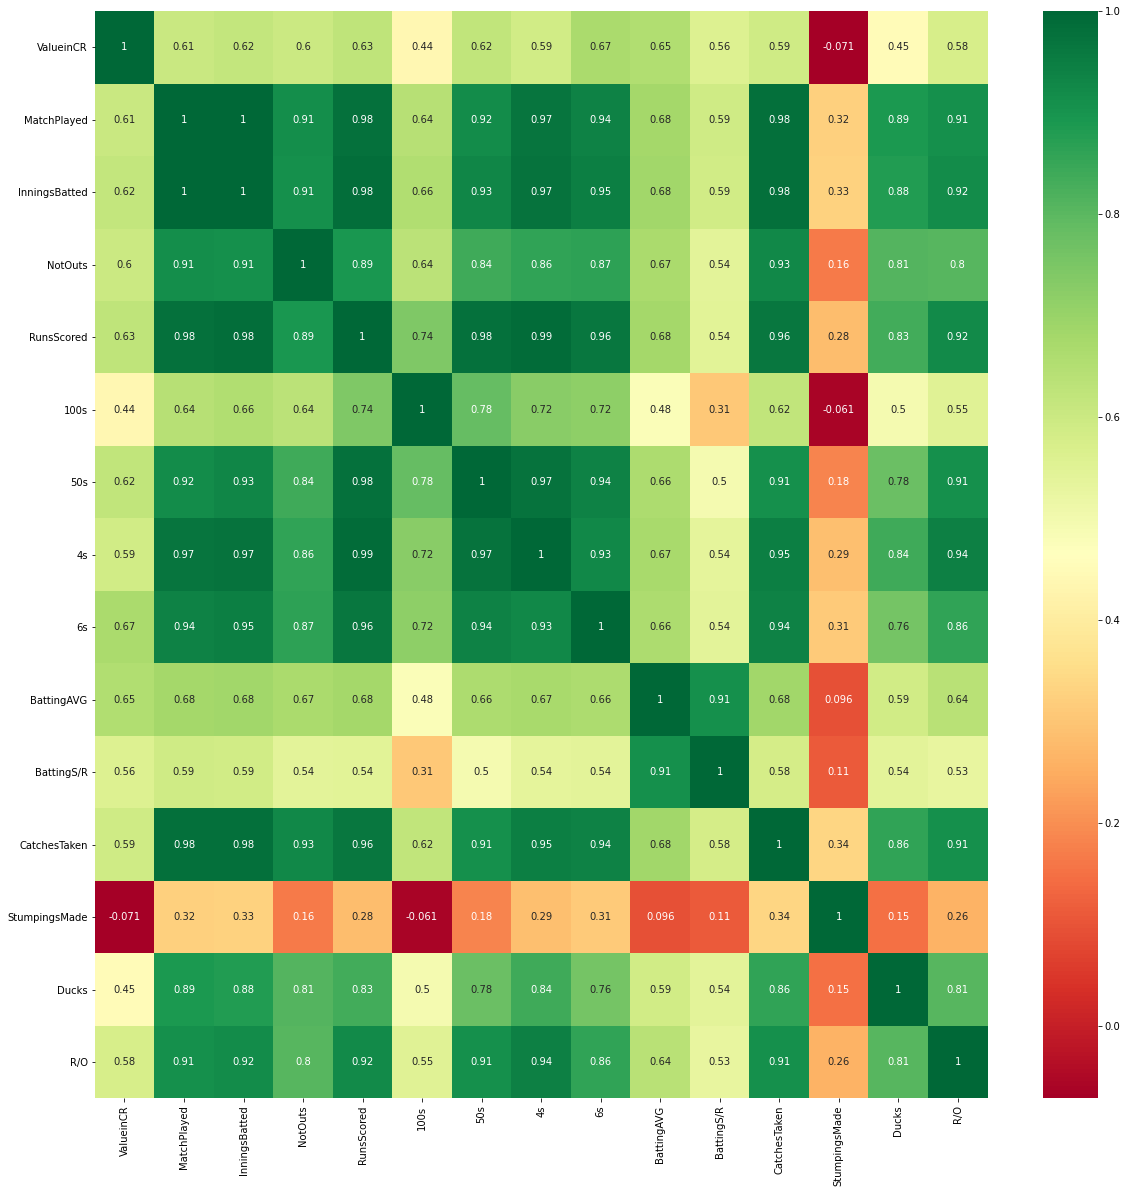

In [77]:
Historical = df_bats[['Name', 'Team', 'Type', 'ValueinCR', 'National Side', 'Batting Style',
       'Bowling','MatchPlayed', 'InningsBatted', 'NotOuts',
       'RunsScored', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O']]

fig = plt.figure(figsize=(20, 20))

fig.set_facecolor('white')

sns.heatmap(Historical.corr(), annot=True, cmap="RdYlGn")

plt.savefig("corr_matrix.png")

In [78]:
# # Assign weights to each feature according to its importance
# w1 = np.zeros(len(df_bats.columns))
# # assign weights = 0.5 to features with importance > 0.5
# w1[df_bats.columns.get_loc('BattingAVG')] = 0.5
# w1[df_bats.columns.get_loc('BattingS/R')] = 0.5
# w1[df_bats.columns.get_loc('CatchesTaken')] = 0.5
# w1[df_bats.columns.get_loc('StumpingsMade')] = 0.5
# w1[df_bats.columns.get_loc('Ducks')] = 0.5
# w1[df_bats.columns.get_loc('R/O')] = 0.5
# w1[df_bats.columns.get_loc('InningsBatted')] = 0.5
# w1[df_bats.columns.get_loc('NotOuts')] = 0.5
# w1[df_bats.columns.get_loc('RunsScored')] = 0.5
# w1[df_bats.columns.get_loc('100s')] = 0.5
# w1[df_bats.columns.get_loc('50s')] = 0.5
# w1[df_bats.columns.get_loc('4s')] = 0.5
# w1[df_bats.columns.get_loc('6s')] = 0.5




In [79]:
# Assigning weights to each feature in df_bats using backward elimination

In [80]:
df_bats['Bat_Score'] = 0.462*df_bats['RunsScored'] + 0.5*df_bats['100s'] + 0.5*df_bats['50s'] + 0.5*df_bats['4s'] + 0.5*df_bats['6s']

In [81]:
df_bats.head()

,Name,Team,Type,ValueinCR,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,...,50s,4s,6s,BattingAVG,BattingS/R,CatchesTaken,StumpingsMade,Ducks,R/O,Bat_Score
0,Mayank Agarwal,6,1,12.00,1,1,6,100.0,95.0,4.0,...,11.0,203.0,85.0,23.41,135.47,40.0,0.0,6.0,4.0,1134.522
1,Shikhar Dhawan,6,1,8.25,1,0,6,192.0,191.0,25.0,...,44.0,654.0,124.0,34.84,126.64,82.0,0.0,11.0,16.0,3084.208
2,Bhanuka Rajapaksa,6,1,0.50,1,2,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000
3,Kane Williamson,9,1,14.00,1,1,6,63.0,62.0,15.0,...,17.0,165.0,56.0,40.10,131.26,29.0,0.0,1.0,3.0,989.870
4,Rahul Tripathi,9,1,8.50,1,1,9,62.0,60.0,7.0,...,7.0,136.0,48.0,26.13,136.31,23.0,0.0,1.0,4.0,735.370


In [82]:
# Sort according to Bat_Score
df_bats = df_bats.sort_values(by=['Bat_Score'], ascending=False)
df_bats.head(10)

,Name,Team,Type,ValueinCR,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,...,50s,4s,6s,BattingAVG,BattingS/R,CatchesTaken,StumpingsMade,Ducks,R/O,Bat_Score
14,Virat Kohli,7,1,15.00,1,1,9,207.0,199.0,31.0,...,42.0,546.0,210.0,37.39,129.94,84.0,0.0,6.0,7.0,3304.246
1,Shikhar Dhawan,6,1,8.25,1,0,6,192.0,191.0,25.0,...,44.0,654.0,124.0,34.84,126.64,82.0,0.0,11.0,16.0,3084.208
17,Rohit Sharma,5,1,16.00,1,1,6,213.0,208.0,28.0,...,40.0,491.0,227.0,31.17,130.39,90.0,0.0,13.0,11.0,2971.782
35,David Warner,1,1,6.25,1,0,4,150.0,150.0,19.0,...,50.0,525.0,201.0,41.59,139.96,68.0,0.0,8.0,9.0,2907.438
23,Robin Uthappa,0,1,2.00,1,1,9,193.0,186.0,17.0,...,25.0,462.0,168.0,27.94,130.15,87.0,32.0,7.0,9.0,2509.064
29,Ajinkya Rahane,3,1,1.00,1,1,9,151.0,141.0,16.0,...,28.0,417.0,76.0,31.52,121.33,58.0,0.0,13.0,7.0,2082.242
39,Manish Pandey,4,1,4.60,1,1,9,154.0,143.0,27.0,...,21.0,309.0,103.0,30.68,121.83,75.0,0.0,13.0,6.0,1861.720
15,Faf du Plessis,7,1,7.00,1,1,4,100.0,93.0,9.0,...,22.0,265.0,96.0,34.94,131.08,66.0,0.0,5.0,9.0,1547.470
18,Suryakumar Yadav,5,1,8.00,1,1,9,115.0,100.0,19.0,...,13.0,261.0,68.0,28.90,135.71,55.0,0.0,7.0,5.0,1252.542
27,Shreyas Iyer,3,1,12.25,1,1,5,87.0,87.0,12.0,...,16.0,196.0,88.0,31.66,123.95,34.0,0.0,6.0,4.0,1247.250


In [84]:
train, test = train_test_split(df_bats, test_size = 0.25, random_state = 10)

xtrain = train[['Team', 'Type', 'ValueinCR', 'National Side', 'Batting Style',
       'Bowling','MatchPlayed', 'InningsBatted', 'NotOuts',
       'RunsScored', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O']]

xtest = test[['Team', 'Type', 'ValueinCR', 'National Side', 'Batting Style',
       'Bowling','MatchPlayed', 'InningsBatted', 'NotOuts',
       'RunsScored', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O']]
ytest = test[['Bat_Score']]

In [85]:
def scores(y, model):
    
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    
    print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred))
    print('R2 score: %.3f' % r2_score(ytest, y_pred))

    cvScore = cross_val_score(model, xtest, ytest.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
    
    for i in y_pred:
        y.append(i)

In [86]:
dnn = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    random_state=10,
    activation='identity',
    learning_rate ='invscaling')

y_dnn = []

scores(y_dnn, dnn)

Mean squared error: 0.040
R2 score: 1.000
R2 cross validation score: 1.00 (+/- 0.00)


In [87]:
rf = RandomForestRegressor(random_state = 200, n_estimators = 100, criterion = 'mse')

y_rf = []

scores(y_rf, rf)

Mean squared error: 10578.578
R2 score: 0.991
R2 cross validation score: 0.72 (+/- 0.22)


<BarContainer object of 20 artists>

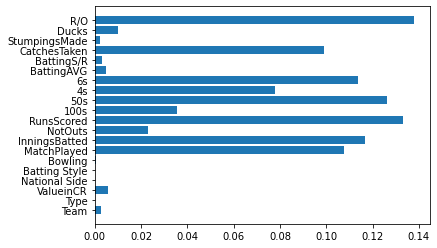

In [88]:
rf.feature_importances_
plt.barh(xtrain.columns, rf.feature_importances_)

In [89]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 9, weights = 'uniform')

y_knn = []

scores(y_knn, knn)

Mean squared error: 259177.429
R2 score: 0.782
R2 cross validation score: nan (+/- nan)


C:\Users\Arhit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Arhit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Arhit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\Arhit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Arhit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **

In [71]:
dfCurrentNames = dfCurrent.iloc[:, 1]
dfCurrentPredict = dfCurrent[['BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]

dfCurrent.head(10)

NameError: name 'dfCurrent' is not defined

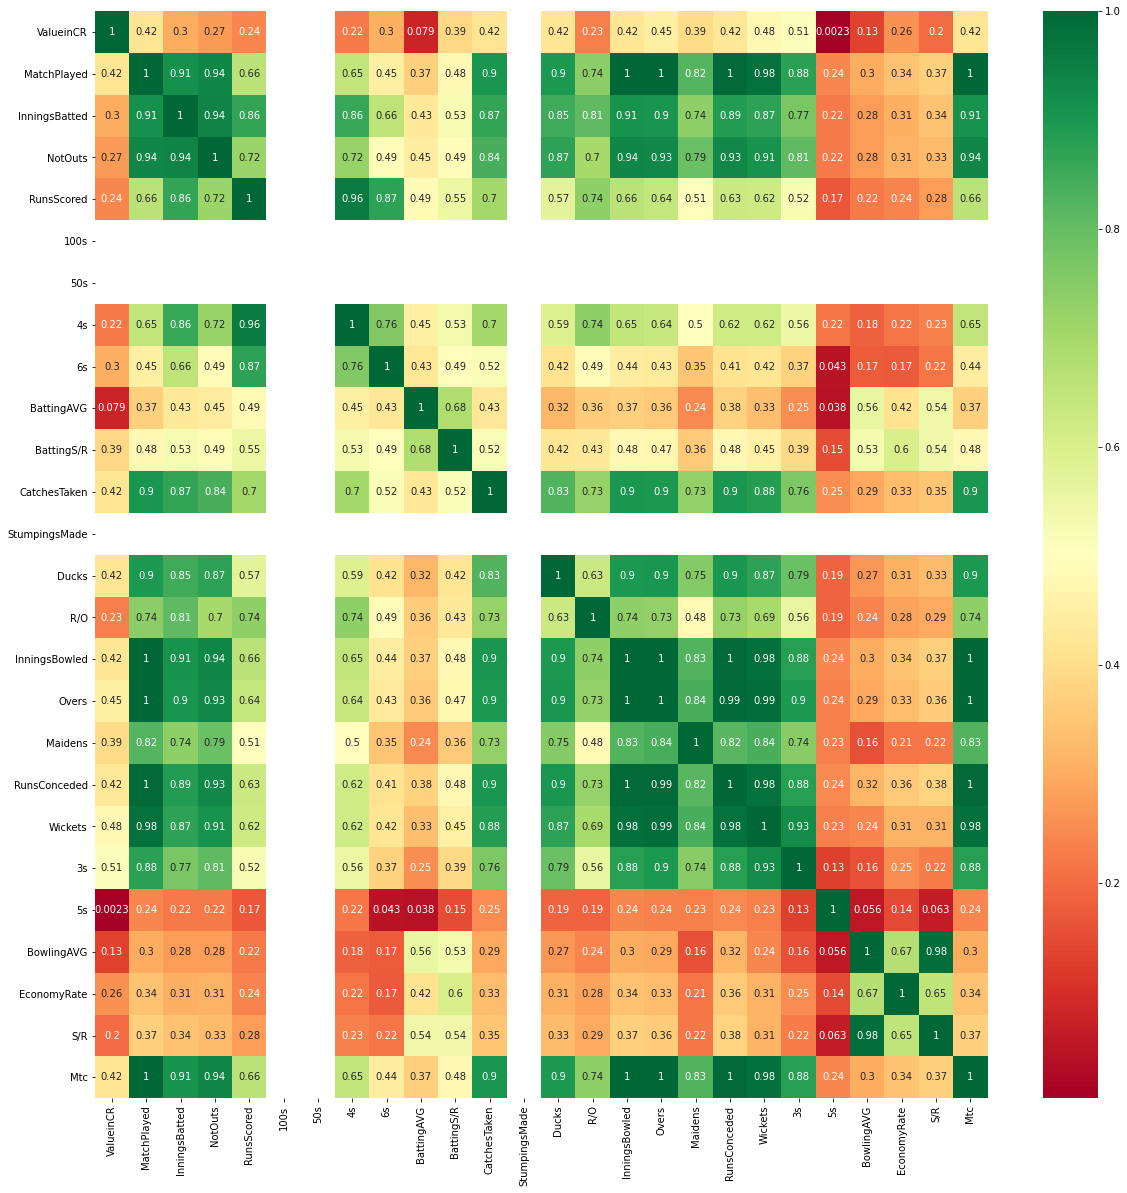

In [45]:
Historical = df_bowl[['Name', 'Team', 'Type', 'ValueinCR', 'National Side', 'Batting Style',
       'Bowling', 'MatchPlayed', 'InningsBatted', 'NotOuts',
       'RunsScored', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled',
       'Overs', 'Maidens', 'RunsConceded', 'Wickets', '3s', '5s',
       'BowlingAVG', 'EconomyRate', 'S/R', 'Mtc']]

fig = plt.figure(figsize=(20, 20))

fig.set_facecolor('white')

sns.heatmap(Historical.corr(), annot=True, cmap="RdYlGn")

plt.savefig("corr_matrix.png")

In [54]:
df_bowl['Bowling_Score'] = -0.5*df_bowl['RunsConceded'] + 0.5*df_bowl['Wickets'] + 0.5*df_bowl['3s'] + 0.5*df_bowl['5s']

In [55]:
# Sort according to Bowling_Score
df_bowl = df_bowl.sort_values(by=['Bowling_Score'], ascending=True)
df_bowl.head(10)

,Name,Team,Type,ValueinCR,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,...,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc,Bowling_Score
50,Umesh Yadav,3,2,2.00,2,1,7,121.0,38.0,24.0,...,3.0,3579.0,119.0,12.0,0.0,30.07,8.51,21.19,120.0,-1724.0
8,Bhuvneshwar Kumar,9,2,4.20,2,1,9,132.0,51.0,25.0,...,9.0,3588.0,142.0,9.0,1.0,25.26,7.30,20.76,132.0,-1718.0
19,Yuzvendra Chahal,8,2,6.50,2,1,5,114.0,18.0,12.0,...,4.0,3097.0,139.0,9.0,0.0,22.28,7.59,17.61,113.0,-1474.5
34,Jasprit Bumrah,5,2,12.00,2,1,7,106.0,20.0,15.0,...,5.0,2997.0,130.0,14.0,0.0,23.05,7.42,18.63,106.0,-1426.5
5,Sandeep Sharma,6,2,0.50,2,1,9,99.0,25.0,19.0,...,8.0,2849.0,112.0,9.0,0.0,25.43,7.77,19.62,99.0,-1364.0
37,Jaydev Unadkat,5,2,1.30,2,1,2,86.0,21.0,12.0,...,3.0,2588.0,85.0,5.0,2.0,30.44,8.74,20.89,85.0,-1248.0
71,Mohammed Shami,2,2,6.25,2,1,7,77.0,23.0,12.0,...,1.0,2402.0,79.0,6.0,0.0,30.40,8.62,21.13,77.0,-1158.5
18,Trent Boult,8,2,8.00,2,1,1,62.0,10.0,7.0,...,5.0,1983.0,76.0,5.0,0.0,26.09,8.39,18.64,62.0,-951.0
69,Rashid Khan,2,2,15.00,2,1,5,76.0,35.0,11.0,...,4.0,1912.0,93.0,10.0,0.0,20.55,6.33,19.48,76.0,-904.5
54,Shardul Thakur,1,2,10.75,2,1,10,61.0,14.0,6.0,...,2.0,1867.0,67.0,5.0,0.0,27.86,8.89,18.80,60.0,-897.5
